In [ ]:
!pwd


/content


In [ ]:
!ls


sample_data


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ar049anjali","key":"7c9e9b7c3d74366e9eba35ae912263aa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 11.4MB/s]


In [ ]:
!unzip loan-prediction-problem-dataset.zip

Archive:  loan-prediction-problem-dataset.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")

In [ ]:
train.shape

(614, 13)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
## removing null values from "Gender" ##
train['Gender'].fillna('Male',inplace=True)

In [ ]:
# choice(just testing)
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dict_Gender=dict(train['Gender'].value_counts())
dict_Gender

{'Female': 112, 'Male': 502}

In [ ]:
# k=0
# for i in dict_Gender.keys():
#   dict_Gender[i]=k;
#   k=k+1;
# dict_Gender

In [ ]:
## converting object type into int type
for i in range(train.shape[0]):
  if train.iat[i, 1] == 'Male':
    train.iat[i, 1] = 0
  else:
    train.iat[i, 1] = 1

In [ ]:
train['Gender'].value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [ ]:
train['Gender']

0      0
1      0
2      0
3      0
4      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 614, dtype: object

In [ ]:
train['Gender'].unique()

array([0, 1], dtype=object)

In [ ]:
# for i in range(train.shape[0]):
#   print(type(train.iat[i,1]))

In [ ]:
train['Gender']=train['Gender'].astype(int)

In [ ]:
type(train['Gender'])

pandas.core.series.Series

In [ ]:
## checking Gender.dtypes
train.dtypes

Loan_ID               object
Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
## "Married" variable
train['Married']


0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [ ]:
train['Married'].fillna('Yes',inplace=True)

In [ ]:
# choice(just testing)
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## converting 'Married' into int variable
dict_Married=dict(train['Married'].value_counts())
dict_Married

{'No': 213, 'Yes': 401}

In [ ]:
k=0
for i in dict_Married.keys():
  dict_Married[i]=k
  k=k+1

dict_Married

{'No': 1, 'Yes': 0}

In [ ]:
for i in range(train.shape[0]):
  if train.iat[i,2]=='Yes':
    train.iat[i,2]=0
  elif train.iat[i,2]=='No':
    train.iat[i,2]=1
  
  


In [ ]:
## choice
train['Married'].value_counts()

0    401
1    213
Name: Married, dtype: int64

In [ ]:
train['Married']=train['Married'].astype(int)

In [ ]:
## choice
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
## Dependents varibale
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
## removing null values
train['Dependents'].fillna('0',inplace=True)  

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
for i in range(train.shape[0]):
  ##print("anjali")
  a = list (train.iat[i,3])
  ##print("anjali2")
  if '+' in a:
    a.pop()
  train.iat[i,3]=int("".join(a))

In [ ]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
## changing to int varibale
train['Dependents']=train['Dependents'].astype(int)

In [ ]:
##choice
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:

## choice
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
## no null values in 'Education'
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
## changing object type to int type of 'Education'
for i in range(train.shape[0]):
  if train.iat[i,4]=='Graduate':
    train.iat[i,4]=0
  else:
    train.iat[i,4]=1

In [ ]:
train['Education'].unique()

array([0, 1], dtype=object)

In [ ]:
train['Education']=train['Education'].astype(int)

In [ ]:
## choice
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
##removing null values of 'self_employed'
train['Self_Employed'].fillna('No',inplace=True)

In [ ]:
## choice
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
## converting into int type:
for i in range(train.shape[0]):
  if train.iat[i,5]=='No':
    train.iat[i,5]=0
  else:
    train.iat[i,5]=1

In [ ]:
train['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [ ]:
train['Self_Employed']=train['Self_Employed'].astype(int)

In [ ]:
# choice
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#choice
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# APPLICANTINCOME
train['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [ ]:
# NO NULL VALUES ARE THERE AND NO DATA CLEANING REQUIRED
train['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
# COAAPLICANT INCOME
train['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [ ]:
train['CoapplicantIncome'].unique()                        ## DOUBT

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [ ]:
# CHOICE
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
## LOANAMOUNT
train['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
# TAKING MEDIAN AND REMOVING NULL VAALUES AS IT IS CONTINUOUS VARIABLE

median_value=train['LoanAmount'].median()
median_value

128.0

In [ ]:
train['LoanAmount'].fillna(median_value,inplace=True)

In [ ]:
# CHOICE

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# LOAN_AMOUNT_TERM
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
## TAKIG  MEDIAN AND REMOVING NULL VALUES

median_value=train['Loan_Amount_Term'].median()
median_value

360.0

In [ ]:
train['Loan_Amount_Term'].fillna(median_value,inplace=True)

In [ ]:
# CHOICE

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## CREDIT HISTORY
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
## TAKING MEDIAN AND REMOVING NULL VALUES
median_value=train['Credit_History'].median()
median_value

1.0

In [ ]:
train['Credit_History'].fillna(median_value,inplace=True)

In [ ]:
# CHOICE

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## CHOICE

train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
##  PROPERTY AREA

train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
## CONVERING OBJECT TYPE INTO INT TYPE

for i in range(train.shape[0]):
  if train.iat[i,11]=='Urban':
    train.iat[i,11]=0
  elif train.iat[i,11]=='Rural':
    train.iat[i,11]=1
  else:
    train.iat[i,11]=2

In [ ]:
train['Property_Area']=train['Property_Area'].astype(int)

In [ ]:
## CHOICE

train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [ ]:
## LOAN STATUS

train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
## CHANGING INTO INT TYPE

for i in range(train.shape[0]):
  if train.iat[i,12]=='Y':
    train.iat[i,12]=1
  else:
    train.iat[i,12]=0

In [ ]:
train['Loan_Status'].unique()

array([1, 0], dtype=object)

In [ ]:
train['Loan_Status']=train['Loan_Status'].astype(int)

In [ ]:
## CHOICE

train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
## LOAN ID

## FINDING NUMBER OF UNIQUE VALUES i.e,, CHECKING DUPLICACY.
## AS LOAN_ID SHOULD BE UNIQUE. IF THERE WOULD BE ANY DUPLICACY THEN IT WILL BE REMOVED

len(train['Loan_ID'].unique())  ## NO DUPLICACY PRESENT

614

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,0,1


# New Section

In [ ]:
## UNIVARIATE ANALYSIS

In [ ]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
## PLOT BAR

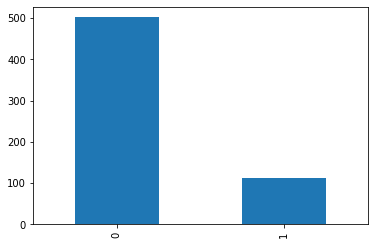

In [ ]:
train['Gender'].value_counts().plot.bar()                  ## 0->MALE  1-> FEMALE

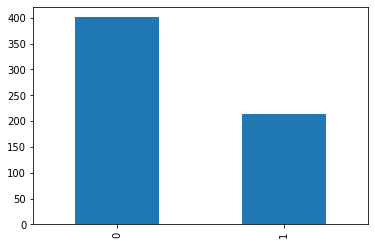

In [ ]:
train['Married'].value_counts().plot.bar()               ## 0-> YES     1->NO

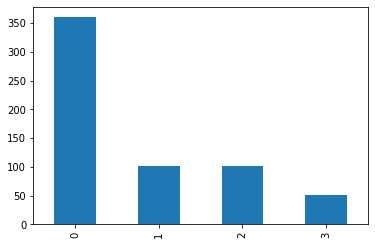

In [ ]:
train['Dependents'].value_counts().plot.bar()

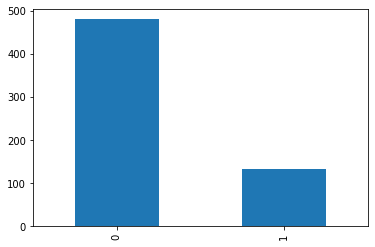

In [ ]:
train['Education'].value_counts().plot.bar()                          ## 0->GRADUATE    1->NOT GRADUATE

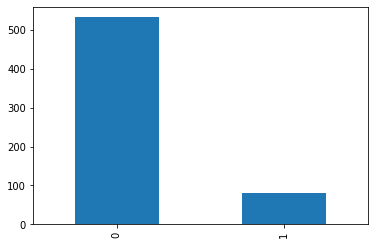

In [ ]:
train['Self_Employed'].value_counts().plot.bar()                    ## 0-> NO           1->YES

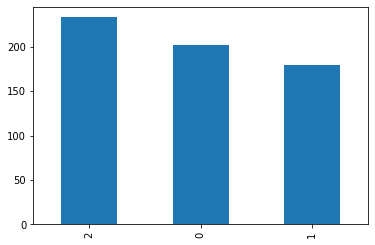

In [ ]:
train['Property_Area'].value_counts().plot.bar()                       ## 0-> URBAN          1-> RURAL       2-> SEMIURBAN

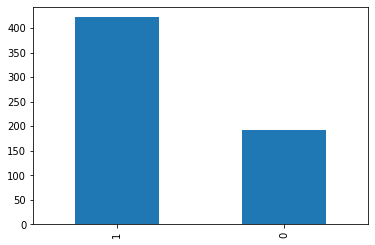

In [ ]:
train['Loan_Status'].value_counts().plot.bar()                   ## 1->YES              0->NO

In [ ]:
## CONTINUOUS VARIABLE


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


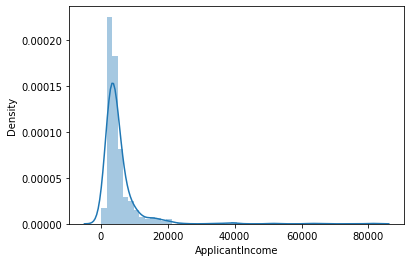

In [ ]:
## APPLICANTINCOME

sns.distplot(train['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


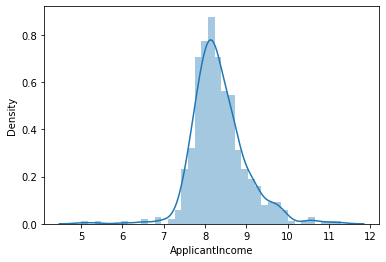

In [ ]:
## taking log transformation

train['ApplicantIncome']=np.log(train['ApplicantIncome'])
sns.distplot(train['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


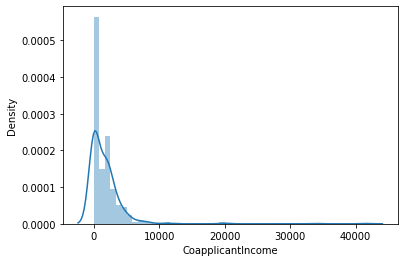

In [ ]:
sns.distplot(train['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


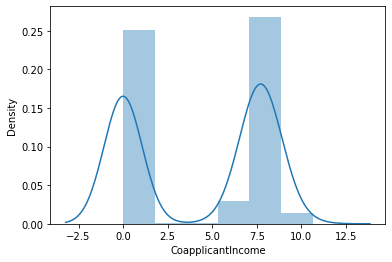

In [ ]:
train['CoapplicantIncome']=np.log(train['CoapplicantIncome']+1)
sns.distplot(train['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


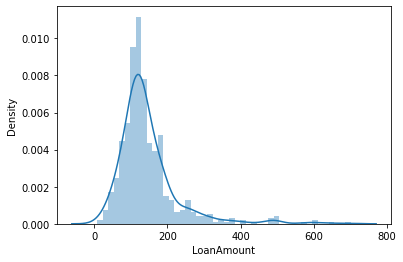

In [ ]:
sns.distplot(train['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


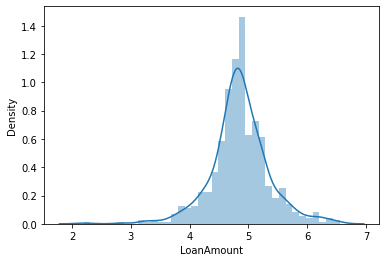

In [ ]:
train['LoanAmount']=np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount'])

In [ ]:
################################ UNIVARIATE ANALYSIS DOUBT FOR LAST TWO CONTINUOUS VARIABLE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


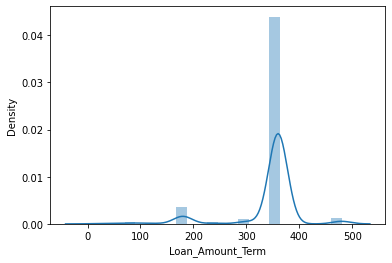

In [ ]:
## Loan_Amount_Term

sns.distplot(train['Loan_Amount_Term'])

In [ ]:
## taking log transformation

train['Loan_Amount_Term']=np.log(train['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


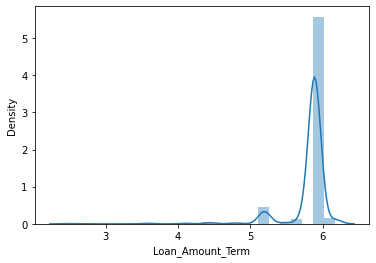

In [ ]:
sns.distplot(train['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


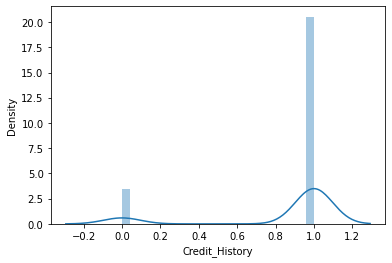

In [ ]:
## credit_History

sns.distplot(train['Credit_History'])

In [ ]:
###########  BIVARIATE ANALYSIS ##############   ( LOAN_STATUS :- 1-YES , 0 :-NO)

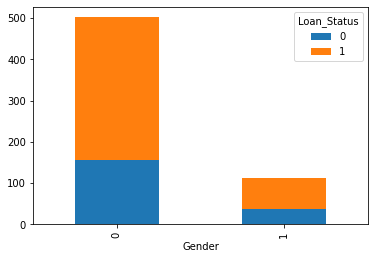

In [ ]:
Gender_plot=pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind="bar",stacked=True)

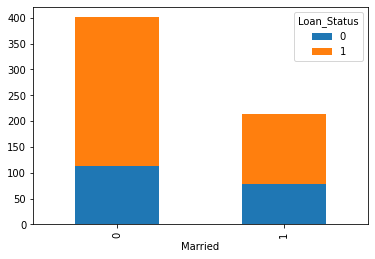

In [ ]:
Married_plot=pd.crosstab(train['Married'],train['Loan_Status']).plot(kind="bar",stacked=True)   ## 0-yes,1-No

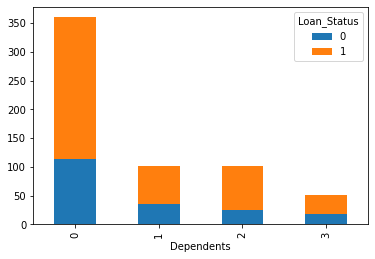

In [ ]:
Dependents_plot=pd.crosstab(train['Dependents'],train['Loan_Status']).plot(kind="bar",stacked=True)

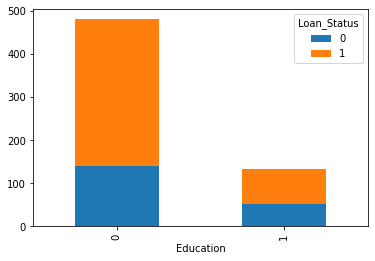

In [ ]:
Education_plot=pd.crosstab(train['Education'],train['Loan_Status']).plot(kind="bar",stacked=True)  ## 0:-graduate , 1:-non-graduate

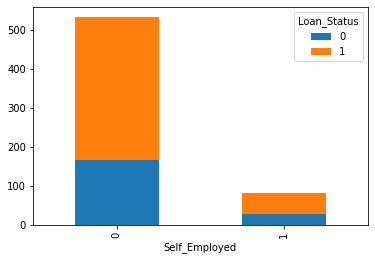

In [ ]:
Self_Employed_plot=pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot(kind="bar",stacked=True)  ## 0 :- no,  1 :-yes

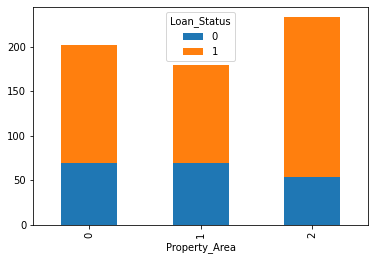

In [ ]:
Credit_History_plot=pd.crosstab(train['Property_Area'],train['Loan_Status']).plot(kind="bar",stacked=True) ## 0:-urban , 1:-rural 2:-semiurban

In [ ]:
## CREATION OF NEW ATTRIBUTES

In [ ]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,0,1,0,0,0,8.674026,0.000000,4.852030,5.886104,1.0,0,1,8.674026
1,LP001003,0,0,1,0,0,8.430109,7.319202,4.852030,5.886104,1.0,1,0,15.749312
2,LP001005,0,0,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,0,1,8.006368
3,LP001006,0,0,0,1,0,7.856707,7.765993,4.787492,5.886104,1.0,0,1,15.622700
4,LP001008,0,1,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,0,1,8.699515


In [ ]:
## DROP UNNECESSARY COLUMNS

In [ ]:
cols = ['Loan_ID']
train=train.drop(columns=cols, axis=1)

In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,8.674026,0.000000,4.852030,5.886104,1.0,0,1,8.674026
1,0,0,1,0,0,8.430109,7.319202,4.852030,5.886104,1.0,1,0,15.749312
2,0,0,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,0,1,8.006368
3,0,0,0,1,0,7.856707,7.765993,4.787492,5.886104,1.0,0,1,15.622700
4,0,1,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,0,1,8.699515


In [ ]:
## MODEL BUILDING

In [ ]:
## LOGISTIC REGRESSION

In [ ]:
#segregating variables: independent and dependent variables
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [ ]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=56,stratify=y)

In [ ]:
#import logistic regression and metric f1_score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [ ]:
#predicting over train_set
logreg=LogReg()
logreg.fit(train_x,train_y)
train_predict=logreg.predict(train_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
k=f1_score(train_predict,train_y)
k

0.8857142857142857

In [ ]:
#predicting over test_set
test_predict=logreg.predict(test_x)
k=f1_score(test_predict,test_y)
k

0.853658536585366

In [ ]:
## DECISION TREE CLASSIFIER

In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#calculating score on train_set
clf.score(train_x,train_y)

1.0

In [ ]:
#calculating score on test_set
clf.score(test_x,test_y)

0.6883116883116883

In [ ]:
### RANDOM FOREST CLASSIFIER

In [ ]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier()
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#calculating score on train_set
clf.score(train_x,train_y)

1.0

In [ ]:
#calculating score on test_set
clf.score(test_x,test_y)

0.7662337662337663

In [ ]:
## LOGISTIC REGRESSION IS BETTER THAN DECISION TREE CLASSIFIER AND RANDOM FOREST CLASSIFIER

In [ ]:
#                                 TESTING OF DATA (TAKING INPUTS)

In [ ]:
gender=int(input("              enter gender:"))                  # MALE-0         FEMALE-1
  
married=int(input("             enter marital_status:"))          #YES-0            NO-1

dependents=int(input("          enter dependents"))               # 0,1,2,3

education=int(input("           enter education:"))

self_employed=int(input("       enter self_employed:"))

applicant_income=int(input("    enter app. income:"))

coapplicant_income=float(input(" enter coapplic. income: "))

loan_amount=float(input("        enter loan amount: "))

loan_amount_term=float(input("   enter loan amount term: "))

credit_history=float(input("     enter credi history: "))

property_area=int(input("       enter property area: "))

loan_status=int(input("         enter loan status:"))

input_train={'Gender':[gender],'Married':[married],'Dependents':[dependents],'Education':[education],'Self_Employed':[self_employed],'ApplicantIncome':[applicant_income],'CoapplicantIncome':[coapplicant_income],'LoanAmount':[loan_amount],'Loan_Amount_Term':[loan_amount_term],'Credit_History':[credit_history],'Property_Area':[property_area],'Loan_Status':[loan_status]}

inputs=pd.DataFrame(input_train)
##print(inputs)

print(logreg.predict(inputs)) 
 

              enter gender:0
             enter marital_status:0
          enter dependents3
           enter education:1
       enter self_employed:1


In [ ]:
print(logreg.predict(inputs))   

[1]


In [ ]:
## AS THE OUTPUT IS 1, HENCE THE LOAN CAN BE APPROVED.
## IF IT IS 0 ,THAT MEANS THE LOAN CAN NOT BE APPROVED.